In [2]:
from PIL import Image
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
from ImageProcessing import ImageProcessor
import cv2
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut
from skimage.color import label2rgb
from skimage.transform import rescale, resize

In [3]:
imgs = []
imgs_cv_gauss = []
print(os.getcwd())
for dirs in os.listdir('./data'):
    imgs.append(np.asarray(Image.open(os.getcwd() + '/data/' + dirs)))
    imgs_cv_gauss.append(cv2.cvtColor(cv2.imread('./data/'+dirs), cv2.COLOR_BGR2RGB ))

/home/nati/crochet/server


In [80]:
imgs_cv = []
parm = 15

for img in imgs:
    dim = img.shape[:2]
    # print("Aspect = ", dim[0]/dim[1])
    dim = (dim[1]//parm, dim[0]//parm)
    # print(dim)
    
    img_new = cv2.bilateralFilter(img, 10, 75, 75)

    kernel = np.ones((5,5),np.uint8)
    img_new = cv2.erode(img_new, kernel, iterations=1)
    img_new = cv2.dilate(img_new, kernel, iterations=1)

    img_new = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)

    # img_new = cv2.medianBlur(img, 5)
    # img_new = cv2.fastNlMeansDenoisingColored(img_new, None, 3, 3, 7, 15)
    
    imgs_cv.append(img_new)

In [5]:
print(imgs_cv[1])

[[[255 208  35]
  [255 208  35]
  [255 209  36]
  ...
  [255 214  46]
  [255 214  46]
  [255 215  44]]

 [[255 208  37]
  [255 210  36]
  [255 210  36]
  ...
  [255 215  44]
  [255 214  46]
  [254 213  45]]

 [[255 210  36]
  [255 210  36]
  [255 210  36]
  ...
  [255 215  44]
  [255 215  44]
  [255 212  45]]

 ...

 [[255 212  47]
  [254 212  51]
  [254 212  51]
  ...
  [255 215  55]
  [255 214  55]
  [255 214  55]]

 [[255 211  49]
  [254 212  51]
  [254 212  51]
  ...
  [255 214  55]
  [255 214  57]
  [255 215  55]]

 [[255 213  50]
  [255 213  50]
  [255 212  47]
  ...
  [255 212  56]
  [255 212  56]
  [255 212  56]]]


1242 839 dims


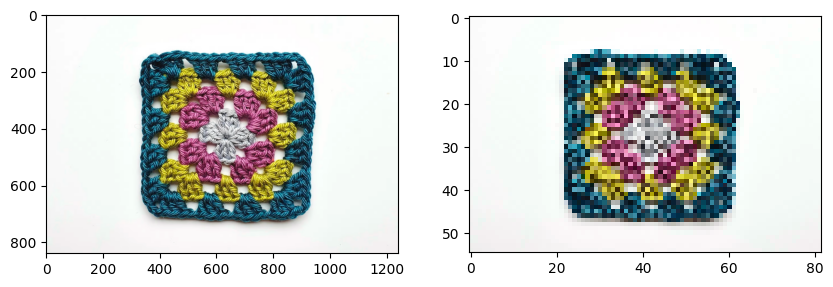

3000 3000 dims


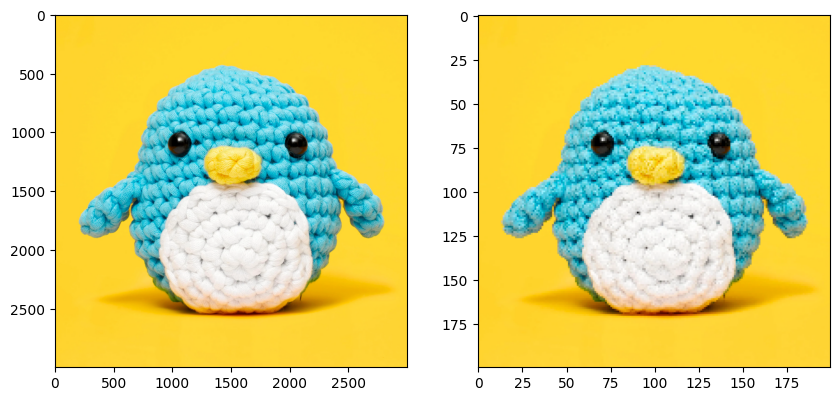

1040 1040 dims


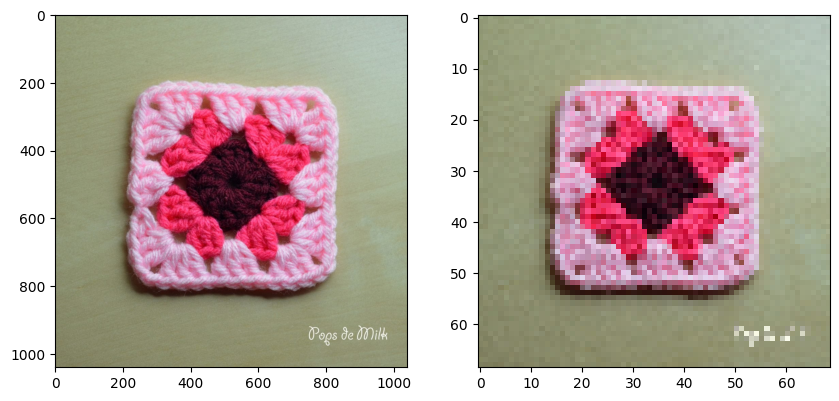

1060 1060 dims


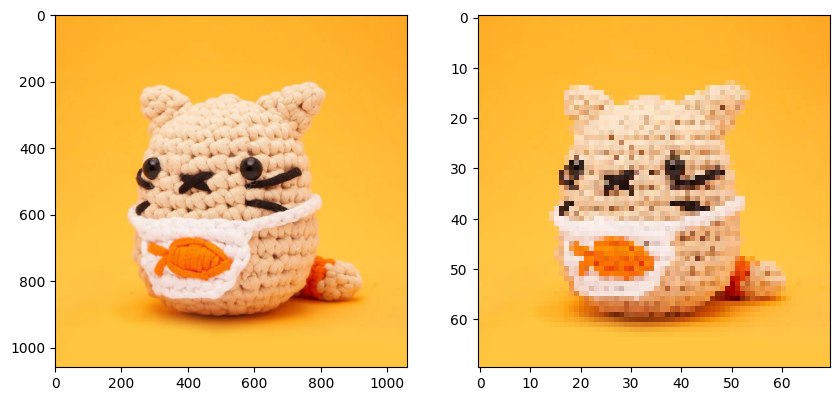

In [ ]:
for ind, img in enumerate(imgs):
    imageProcesser = ImageProcessor(img, img.shape[1], img.shape[0], mode = 'np')
    # fig, axs = plt.subplots(1, 2, figsize=(10, 8))

    # axs[0].imshow(img)
    # axs[1].imshow(imageProcesser.pixel_data)
# 
    fig1, axs1 = plt.subplots(1, 2, figsize=(10, 8))
    axs1[0].imshow(imgs_cv_gauss[ind])
    axs1[1].imshow(imgs_cv[ind])
    

    plt.show()


In [ ]:
""" 
1. similar to the eroding method, have cycles 

- Iterate through pixels and label each as groups of similar color. Similar color 
is a threshold within each other for all channels.
- Do multiple cycles of this

2. Do edge detection, where the edge extends at least 10 pixels.

3. For every pixel that is not an edge color it as the mode of the neighborhood

"""

In [132]:

# contains the label for the group and all the similar colors to then take the average
# {key: {colors: [], avg: int}}

In [7]:
def colorSimplify(c1, colorScheme, threshold = 10):
    # r1, g1, b1 = c1
    h1, l1, s1 = c1
    for c2 in colorScheme:
        # r2, g2, b2 = c2
        h2, l2, s2 = c2
        if abs(h1 - h2) < threshold: 
            return c2
        # if abs(s1 - s2) > threshold: continue
        # if abs(l1 - l2) > threshold: continue
        
    
    colorScheme.append(c1)
    return c1
    


In [8]:
x = np.zeros((55, 82, 3))
x[1][1] = [192]

In [155]:
cv2.cvtColor(imgs_cv[1], cv2. COLOR_BGR2HLS)

array([[[ 96, 145, 255],
        [ 96, 145, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 255]],

       [[ 96, 146, 255],
        [ 96, 146, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 253]],

       [[ 96, 146, 255],
        [ 96, 146, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 255]],

       ...,

       [[ 96, 151, 255],
        [ 96, 153, 253],
        [ 96, 153, 253],
        ...,
        [ 96, 155, 255],
        [ 96, 155, 255],
        [ 96, 155, 255]],

       [[ 96, 152, 255],
        [ 96, 153, 253],
        [ 96, 153, 253],
        ...,
        [ 96, 155, 255],
        [ 96, 156, 255],
        [ 96, 155, 255]],

       [[ 96, 152, 255],
        [ 96, 152, 255],
        [ 96, 151, 255],
        ...,
        [ 96, 156, 255],
        [ 96, 156, 255],
        [ 96, 156, 255]]

In [173]:
def simplify(img, cycles = 2):
    height, width = img.shape[:2] # what ever the appropriate way to get dims
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    # new_img = np.int32(img)
    print(width, height)


    for cyc in range(cycles):
        colorScheme = []
        for col_ind, col in enumerate(img):
            for row_ind, color in enumerate(col):
                new_img[col_ind][row_ind] = colorSimplify(color, colorScheme)
    
    return new_img

In [10]:
def colorSimple(c1: tuple[np.int32], colorScheme: list[tuple[np.int32]], threshold = 10):
    r1, g1, b1 = c1
    for c2 in colorScheme:
        r2, g2, b2 = c2
        if abs(r1 - r2) > threshold: continue
        if abs(g1 - g2) > threshold: continue
        if abs(b1 - b2) > threshold: continue
        return c2
        
    
    colorScheme.append(c1)
    return c1

def reduce(segmented: np.ndarray, img: np.ndarray) -> tuple[np.ndarray, list[tuple[np.int32]]]:
    unique = np.unique(segmented)
    final = np.int32(img)
    colorScheme = []

    for u in np.asarray((unique)).T:
        inds = np.where(segmented == u)
        avg_col = np.mean(final[inds], axis = 0, dtype=np.int32)
        color = colorSimple(avg_col, colorScheme)
        print(type(color))
        final[inds] = color 

    return final, colorScheme

def make_2d(flat_img: list[float | int], height: int, width: int) -> np.ndarray:
    return np.array(flat_img).reshape((height, width, 3))



def resize_img(img: list[float], height: int, width: int, scale: int) -> np.ndarray:

    new_dim = (width//scale, height//scale)
    
    img_new = cv2.bilateralFilter(img, 10, 75, 75)

    kernel = np.ones((5,5),np.uint8)
    img_new = cv2.erode(img_new, kernel, iterations=1)
    img_new = cv2.dilate(img_new, kernel, iterations=1)

    img_new = cv2.resize(img, new_dim, interpolation = cv2.INTER_LINEAR)
    return img_new

def pixelate(img: np.ndarray, height:int, width:int) -> tuple[np.ndarray, list[tuple[np.int32]]]:
    nseg = np.ceil(np.log10(height*width)) * 100
    segmented = slic(img, n_segments=nseg, compactness=80)
    final, colorScheme = reduce(segmented, img)
    return final, colorScheme


In [ ]:
imgs = []
imgs_cv_gauss = []
for dirs in os.listdir('./data'):
    print()
    imgs.append(np.asarray(Image.open(os.getcwd() + '/data/' + dirs)))
    img = cv2.cvtColor(cv2.imread('./data/'+dirs), cv2.COLOR_BGR2RGB )
    print("original", type(img), img.shape)
    height, width, _ = img.shape
    flat_img = img.flatten()
    img_2d = make_2d(flat_img, height, width)
    print("2d", type(img_2d), img_2d.shape)


original <class 'numpy.ndarray'> (839, 1242, 3)
2d <class 'numpy.ndarray'> (839, 1242, 3)
original <class 'numpy.ndarray'> (3000, 3000, 3)
2d <class 'numpy.ndarray'> (3000, 3000, 3)
original <class 'numpy.ndarray'> (1040, 1040, 3)
2d <class 'numpy.ndarray'> (1040, 1040, 3)
original <class 'numpy.ndarray'> (1060, 1060, 3)
2d <class 'numpy.ndarray'> (1060, 1060, 3)


55 82


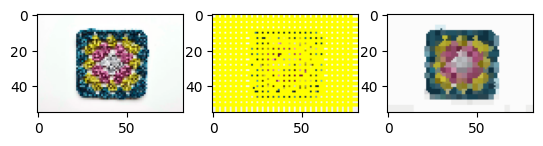

200 200


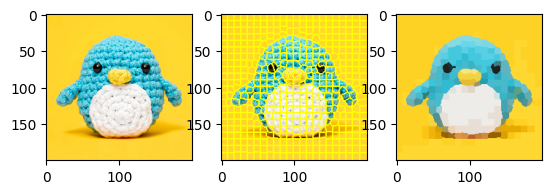

69 69


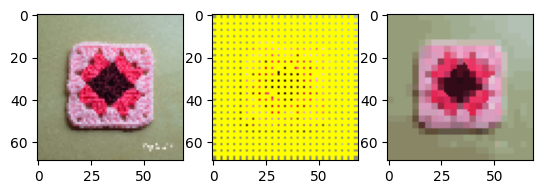

70 70


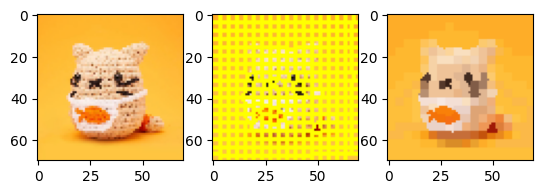

In [ ]:
for ind, img in enumerate(imgs_g):
    # if ind != 1:    
    # new_img = simplify(img)

    # fig1, axs1 = plt.subplots(1, 2, figsize=(10, 8))
    # axs1[0].imshow(img)
    # axs1[1].imshow(new_img.astype(np.int32))
    # plt.show()
    dim = img.shape[:2]
    # print("Aspect = ", dim[0]/dim[1])
    dim = (dim[1]//parm, dim[0]//parm)
    # print(dim)
    
    img_new = cv2.bilateralFilter(img, 10, 75, 75)

    kernel = np.ones((5,5),np.uint8)
    img_new = cv2.erode(img_new, kernel, iterations=1)
    img_new = cv2.dilate(img_new, kernel, iterations=1)

    img_new = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)

    imgs_cv_gauss.append(cv2.cvtColor(cv2.imread('./data/'+dirs), cv2.COLOR_BGR2RGB ))

    height, width = img.shape[:2]
    print(height, width)
    # nseg = height*width // 45
    nseg = np.ceil(np.log10(height*width)) * 100
    # npimg = np.array(img)
    # print(npimg.shape)
    new_img = slic(img,n_segments=nseg,compactness=80)

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.subplot(1,3,2)
    
    # plt.imshow(label2rgb(new_img, img, kind = 'avg'))
    plt.imshow(mark_boundaries(img, new_img))

    final, _ = reduce(new_img, img)
    # final = cv2.resize(final, (height/2, width/2), interpolation=cv2.INTER_CUBIC)
    plt.subplot(1,3,3)
    plt.imshow(final)
    plt.show()
    

- Generate segments by looking for large differences in textures/hues.
- Within segments smooth it out a lot

1. edge detection
2. within edge boundaries, similarity of features.
3. average over segments